In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv('matches.csv')

In [3]:
matches.head()

,match_id,season,date_time,team,opponent,stadium,home_team_score,away_team_score,penalty_shoot_out,attendance,result,timestamp,opp_code,day_code,venue_code,target,total_wins,total_goals,appearances
0,mt1,2021,2021-09-15 20:00:00,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,W,1.631736e+09,55,2,1,1,40.0,83,32
1,mt2,2021,2021-09-15 20:00:00,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546,D,1.631736e+09,53,2,1,0,4.0,9,15
2,mt3,2021,2021-09-28 20:00:00,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350,W,1.632859e+09,45,1,1,1,31.0,67,27
3,mt4,2021,2021-09-28 20:00:00,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0,23500,L,1.632859e+09,19,1,1,2,14.0,26,16
4,mt5,2021,2021-10-19 17:45:00,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0,24915,L,1.634666e+09,45,1,1,2,4.0,9,15


In [7]:
# check the format of the datetime column
format_str = pd.to_datetime(matches['date_time'], infer_datetime_format=True).dt.strftime('%Y-%m-%d %H:%M:%S').iloc[0]
print(f'The format of datetime values in the column is: {format_str}')


The format of datetime values in the column is: 2021-09-15 20:00:00


In [8]:
# convert the datetime column to datetime dtype
matches['date_time'] = pd.to_datetime(matches['date_time'])

In [9]:
matches.dtypes

match_id                     object
season                        int64
date_time            datetime64[ns]
team                         object
opponent                     object
stadium                      object
home_team_score               int64
away_team_score               int64
penalty_shoot_out             int64
attendance                    int64
result                       object
timestamp                   float64
opp_code                      int64
day_code                      int64
venue_code                    int64
target                        int64
total_wins                  float64
total_goals                   int64
appearances                   int64
dtype: object

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

In [33]:
train=matches[matches["date_time"]< '2022-06-01']

In [34]:
test = matches[matches["date_time"] > '2016-01-01']

In [35]:
# Define the predictors
predictors = ["venue_code", "opp_code", "day_code", "total_wins", "total_goals", "appearances"]

In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train[predictors] = imputer.fit_transform(train[predictors])
test[predictors] = imputer.transform(test[predictors])

In [37]:
lr.fit(train[predictors], train["target"])

LogisticRegression(max_iter=1000)

In [38]:
# Make predictions on the test set
preds = lr.predict(test[predictors])

In [51]:
from sklearn.metrics import accuracy_score
# Evaluate the model's accuracy
accuracy = accuracy_score(test["target"], preds)
print("Accuracy:", accuracy)

Accuracy: 0.5376344086021505


In [40]:
result_df = pd.concat([test['target'], pd.Series(preds, name='predicted', index=test.index)], axis=1)
print(result_df)

     target  predicted
0         1          1
1         0          2
2         1          1
3         2          1
4         2          2
..      ...        ...
739       1          1
740       2          2
741       1          1
742       1          1
743       2          1

[744 rows x 2 columns]


In [41]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(test["target"], preds)
print(cm)

[[  0  69  90]
 [  0 237  90]
 [  0  95 163]]


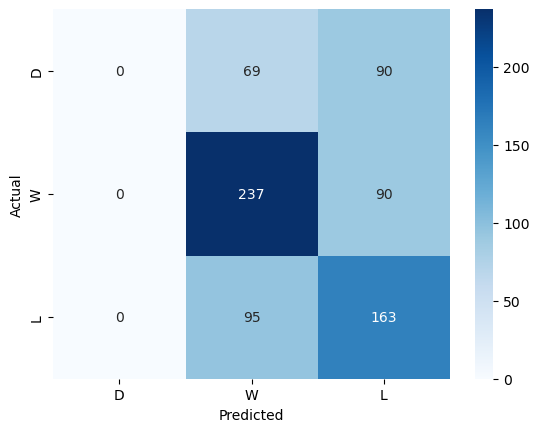

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["D", "W", "L"], yticklabels=["D", "W", "L"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
combined=pd.DataFrame(dict(actual=test["target"], prediction=preds))

In [44]:
pd.crosstab(index=combined["actual"], columns= combined["prediction"])

prediction,1,2
actual,,
0,69,90
1,237,90
2,95,163


In [48]:
from sklearn.metrics import precision_score

precision = precision_score(test["target"], preds, average='weighted', zero_division=1)
print("Precision Score: {:.2f}".format(precision))


Precision Score: 0.64


In [46]:
from sklearn.metrics import f1_score

f1 = f1_score(test["target"], preds, average='weighted')
print("F1 Score: {:.2f}".format(f1))



F1 Score: 0.47


In [47]:
import joblib

filename = 'match_prediction_model_lr_test2.joblib'
joblib.dump(lr, filename)

['match_prediction_model_lr_test2.joblib']